# **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models,callbacks
from tensorflow.keras.models import load_model

# **Load the dataset**


In [2]:
(X_train , y_train) , (X_test , y_test ) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# **Data Preprocessing**

In [3]:
# Normalize the pixel value :
X_train = X_train / 255.0
X_test = X_test / 255.0

# Results :
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


# **Visualizing the Digits Image Dataset**

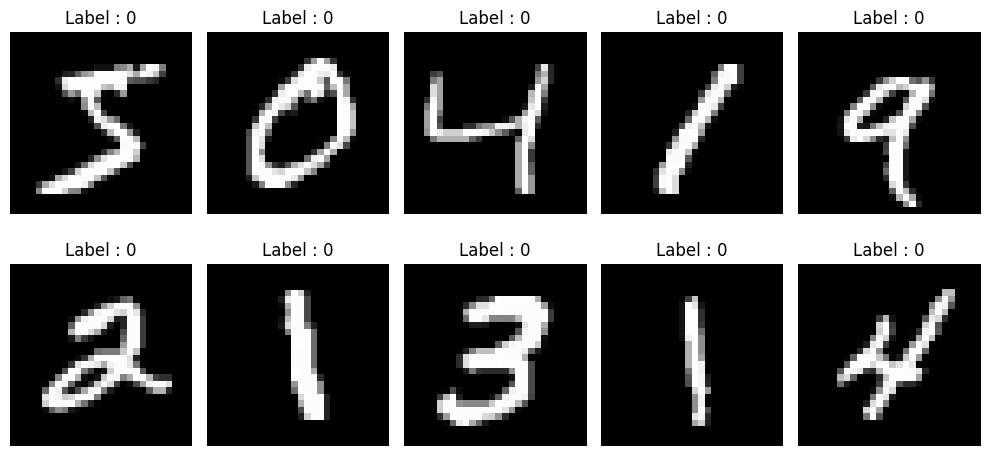

In [4]:
plt.figure(figsize=(10,5)) #sizing the canvas
for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[i].reshape(28,28)
    plt.imshow(img, cmap='gray') #black and white
    plt.title(f"Label : {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()

In [5]:
# Reshaping as without it  Conv2D layers will not know how many channels the image has and will give an error.
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))


In [6]:
# One Hot Encoding of Output Variable(labels)

y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Checking Labels:
print("Original label:", y_train[2])
print("One-hot label:", y_train_oh[2])


Original label: 4
One-hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [7]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),#Randomly rotates the image up to ±10%
    layers.RandomZoom(0.1) #Randomly zooms in or out by 10%
])

# **Model Training Using CNN**

In [8]:
def create_model():
    model = models.Sequential([
        data_augmentation,
        layers.Conv2D(128,(3,3),activation ='relu',input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64,(3,3),activation ='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32,(3,3),activation ='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),


        layers.Flatten(), # flattening the layer to convert 3D feature space into 1D vector

        layers.Dense(64, activation = 'relu'), # Fully Connected Layer
        layers.Dropout(0.4),                   # Prevent Overfitting
        layers.Dense(10,activation = 'softmax') # Output layer
    ])
    return model

In [9]:
# Calling the Model
model = create_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Model compile
model.compile(optimizer ='SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [11]:
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

In [12]:
# Training the Model
history = model.fit(
    X_train,
    y_train_oh,
    epochs=25,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7088 - loss: 0.9138 - val_accuracy: 0.9625 - val_loss: 0.1179 - learning_rate: 0.0100
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9220 - loss: 0.2661 - val_accuracy: 0.9723 - val_loss: 0.0947 - learning_rate: 0.0100
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9443 - loss: 0.1972 - val_accuracy: 0.9765 - val_loss: 0.0853 - learning_rate: 0.0100
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9491 - loss: 0.1804 - val_accuracy: 0.9795 - val_loss: 0.0673 - learning_rate: 0.0100
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9557 - loss: 0.1596 - val_accuracy: 0.9778 - val_loss: 0.0744 - learning_rate: 0.0100
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9579 - loss: 0.1443 - val_accuracy: 0.9768 - val_loss: 0.0728 - learning_rate: 0.0100
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.

In [13]:
# Evaluation
test_loss, test_acc = model.evaluate(X_test,y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9825 - loss: 0.0571


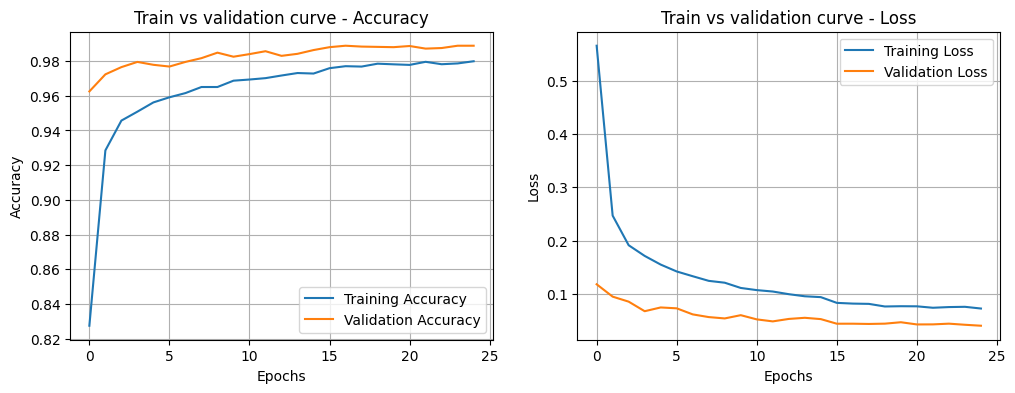

In [14]:
# Visualization
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Train vs validation curve - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Train vs validation curve - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [15]:
# Saving the Model
model.save('mnist_digit_classifier.h5')

In [16]:
# Load the Model (for Reuse)
model_saved = load_model('mnist_digit_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted digit: 7


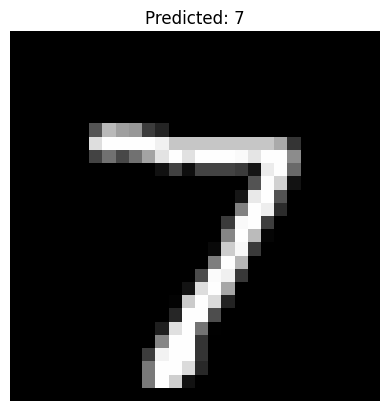

In [17]:
# Predict the first image in test set
pred = model.predict(np.expand_dims(X_test[0], axis=0))  # shape (1,28,28,1)
predicted_class = np.argmax(pred)

print("Predicted digit:", predicted_class)


# Visualize the Prediction
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()